# Project Overview

# Importing Basic Libraries

In [66]:
#These are the libraries I typically use in my analysis so I find it easier to import them all at once
#If I need more libraries I will import them as needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Data Importation

In [67]:
#Here we are importing three separate csv datasets into Jupyter Notebook

summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [68]:
#Here is a brief look at the summer dataset
#This is for the summer Olympic games

summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [69]:
#Here is a brief look at the winter dataset
#This is for the winter Olympic games

winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [70]:
#Here is a brief look at the dictionary dataset
#Looks like it deals with country data, not sure why it's titled "dictionary"

dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [71]:
#Here we are filtering out all rows that have a null value in them

dic[dic.isnull().any(axis = 1)]

,Country,Code,Population,GDP per Capita
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
9,Aruba*,ARU,103889.0,NaN
20,Bermuda*,BER,65235.0,NaN
27,British Virgin Islands,IVB,30117.0,NaN
36,Cayman Islands*,CAY,59967.0,NaN
45,Cook Islands,COK,NaN,NaN
49,Cuba,CUB,11389562.0,NaN
61,Eritrea,ERI,NaN,NaN
74,Guam,GUM,169885.0,NaN


# Merging and Concatenating Dataframes

In [72]:
#Here we are combining the winter and summer datasets into one dataframe called "olympics"
#We are vertically concatenating the dataets, so built on rows

olympics = pd.concat([summer, winter], axis = 0, keys = ["Summer", "Winter"],
                    names = ["Edition"]).reset_index().drop(columns = "level_1")

In [73]:
#Here is the newly combined dataframe

olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [74]:
#Here we are merging the olympics dataframe with the dic dataframe
#We are performing a left-join based on country codes

olympics = olympics.merge(dic.iloc[:, :2], how = 'left',
                          left_on = "Country", right_on = "Code").drop(columns = ["Code"])

In [75]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


# Data Cleaning Part One

In [76]:
#Here we are renaming the country x and country y columns into Code and Country respectively

olympics.rename(columns = {"Country_x": "Code", "Country_y": "Country"}, inplace = True)

In [77]:
#Here we are renaming the GDP per Capita column into just GDP

dic.rename(columns = {"GDP per Capita": "GDP"}, inplace = True)

In [78]:
#Here we are creating a separate index documenting all the rows that have null values in the olympics dataframe

missing_C_index = olympics.loc[olympics.Country.isnull()].index

In [79]:
#Here is a look at the index

missing_C_index

Int64Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,
              260,
            ...
            33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979,
            33980],
           dtype='int64', length=6367)

In [80]:
#Here are the country null value counts
#URS has the most. Which country is that? Apparently it's the Soviet Union

olympics.loc[olympics.Country.isnull()].Code.value_counts()

URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: Code, dtype: int64

In [81]:
#Here we are creating a separate index with all the null country codes

old_c = olympics.loc[olympics.Country.isnull(), :].Code.value_counts().index

In [82]:
#Here is a look at the index

old_c

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object')

In [83]:
#Here we are creating a panda series with all of the outdated countries

mapper = pd.Series(index = old_c, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "Yugoslavia",
                                                           "Unified Team", "Unified Team of Germany", "Mixed teams",
                                                           "Australasia", "Russian Empire", "Montenegro", "Singapore",
                                                            "Trinidad and Tobago", "West Indies Federation",
                                                           "Independent Olympic Participants", 'West Germany',
                                                           'Czechoslovakia', 'Serbia', 'Bohemia'])

In [84]:
#Here is a look at the series

mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                          Yugoslavia
TCH                        Unified Team
YUG             Unified Team of Germany
EUN                         Mixed teams
EUA                         Australasia
ZZX                      Russian Empire
SRB                          Montenegro
ANZ                           Singapore
RU1                 Trinidad and Tobago
MNE              West Indies Federation
TTO    Independent Olympic Participants
BOH                        West Germany
BWI                      Czechoslovakia
SGP                              Serbia
IOP                             Bohemia
Name: Country, dtype: object

In [85]:
#Now we are mapping the old countries to the missing ones in our database
#map() function returns a map object(which is an iterator) of the results after applying the given 
#function to each item of a given iterable (list, tuple etc.)

olympics.loc[missing_C_index, "Code"].map(mapper)

132      Russian Empire
133      Russian Empire
134      Russian Empire
135      Russian Empire
136      Russian Empire
              ...      
33961       Mixed teams
33977      Unified Team
33978      Unified Team
33979      Unified Team
33980      Unified Team
Name: Code, Length: 6367, dtype: object

In [86]:
#Here we are also filling in all missing country/code values

olympics.Country.fillna(olympics.Code.map(mapper), inplace = True)

In [87]:
#Now we only have four missing values in Code and Country after the cleaning

olympics.isna().sum()

Edition       0
Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Code          4
Gender        0
Event         0
Medal         0
Country       4
dtype: int64

# Data Cleaning Part Two

In [88]:
#Here we are dropping all null values from the Code column

olympics.dropna(subset = ["Code"], inplace = True)

In [89]:
#Here we are resetting the index of our olympics dataframe

olympics.reset_index(drop = True, inplace = True)

In [90]:
#Here we are taking a look at the unique values of each column

olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

In [91]:
#Here we are changing the data type of Medal to category

olympics.Medal = olympics.Medal.astype("category")

In [92]:
#Here we are looking at the medal counts sorted
#As you can see it sort of makes no sense to order categories on their own
#They just get ordered alphabetically
#We have to attach an ordered value to the values themselves

olympics.Medal.sort_values()

36930    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

In [93]:
#Here we are making sure that the values within the Medal column are all separate categories (bronze, silver, gold)
#We want them to be ordered because we know gold > silver > bronze in the olympics

olympics.Medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True, inplace = True)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [94]:
#Now we are sorting values again
#As you can see there's a "Categories" recap at the bottom

olympics.Medal.sort_values()

36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

# What are the Most Successful Olympic Countries of All Time?

In [95]:
#Here we are creating a separate dataframe with the top ten countries in olympic medals

top_10 = olympics.Country.value_counts().head(10)

In [96]:
top_10.head()

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Name: Country, dtype: int64

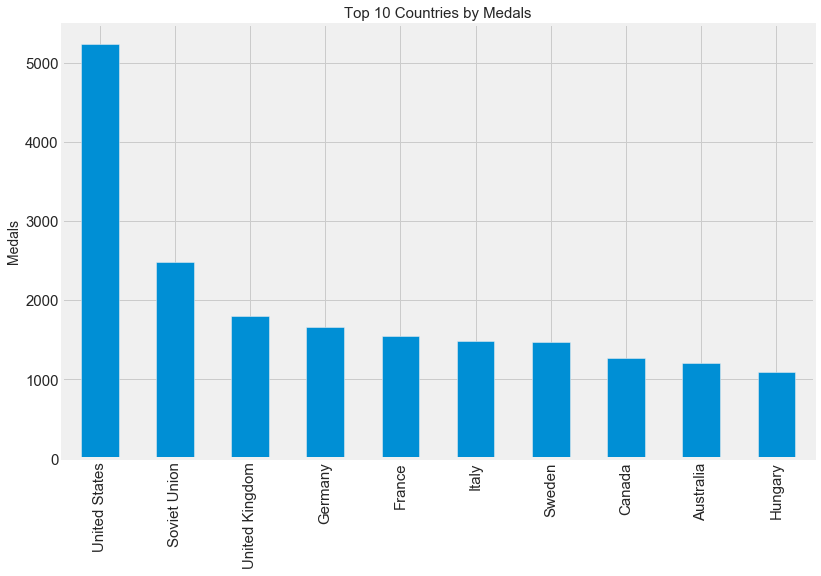

In [97]:
#Here we are plotting the top ten countries by medals
#US is number one, followed by the Soviet Union

top_10.plot(kind = 'bar', fontsize = 15, figsize = (12,8))
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14)
plt.show()

In [98]:
#Here we are filtering our olympics dataframe for just the countries in the top ten in medals

olympics_10 = olympics[olympics.Country.isin(top_10.index)]

In [99]:
#Here is what the new dataframe looks like

olympics_10.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States


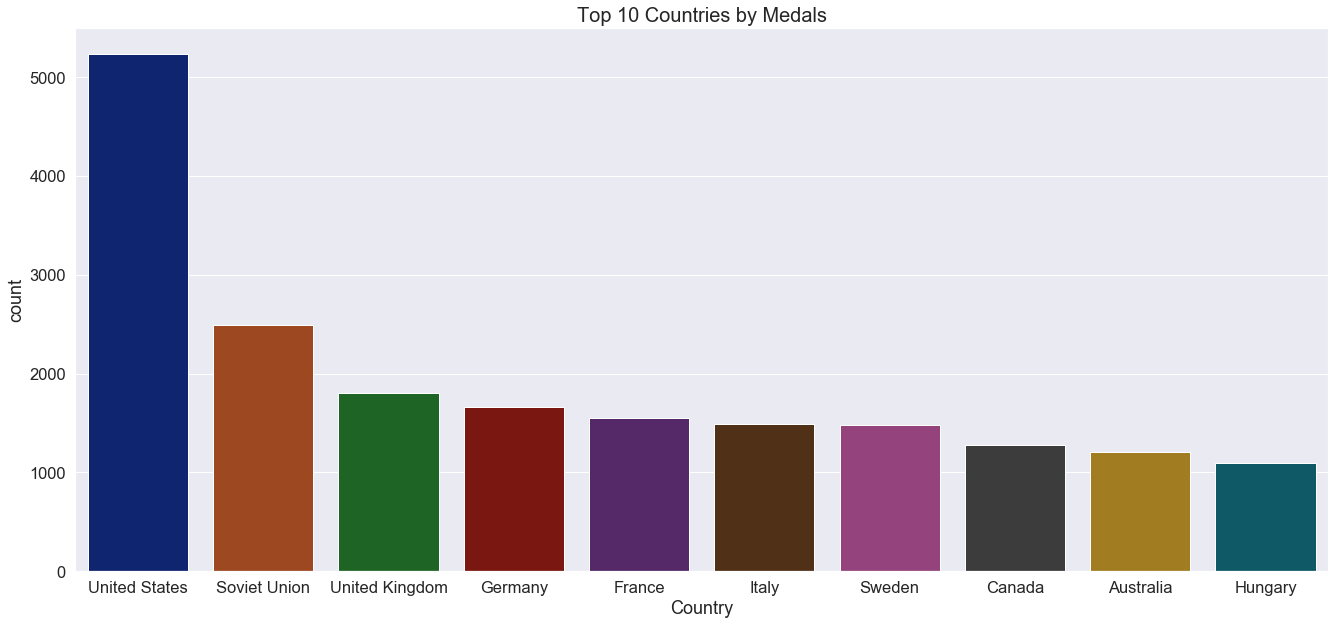

In [100]:
#Here we are plotting again the top ten countries by medal

plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5, palette = 'dark')
sns.countplot(data = olympics_10, x = "Country", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

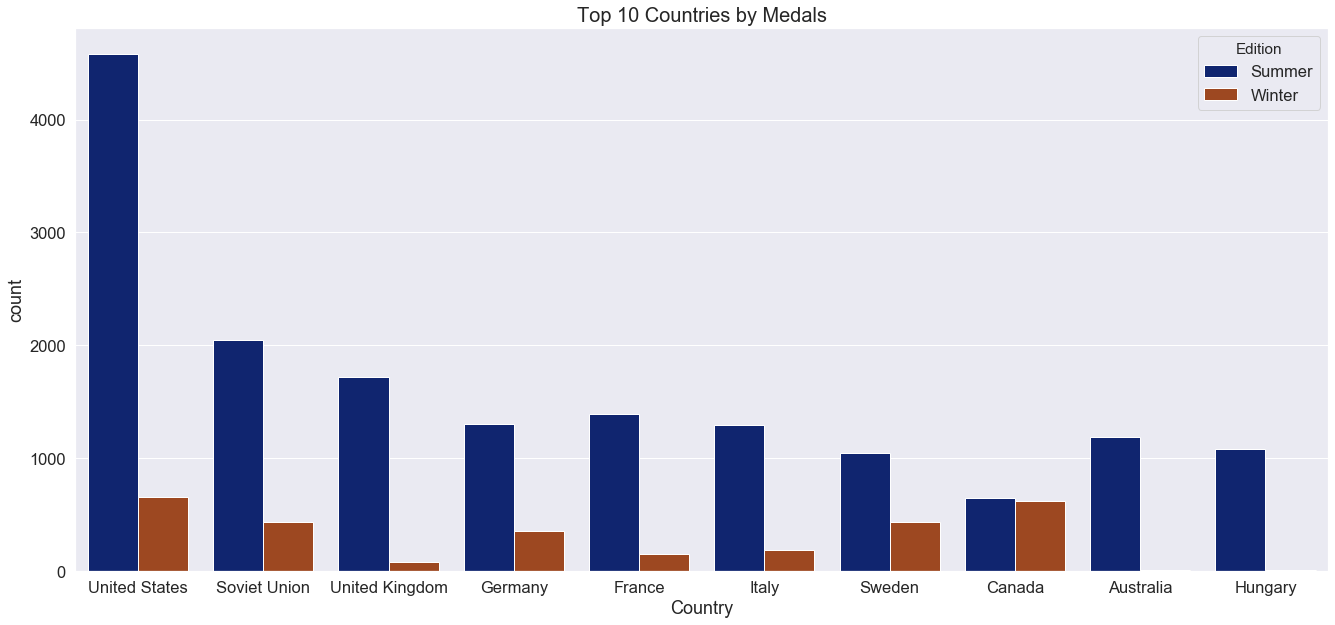

In [101]:
#Here we are plotting again the top ten countries by medal
#But now we are splitting between Summer and Winter medals 
#This is done via hue = Edition

plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5, palette = 'dark')
sns.countplot(data = olympics_10, x = "Country", hue = 'Edition', order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

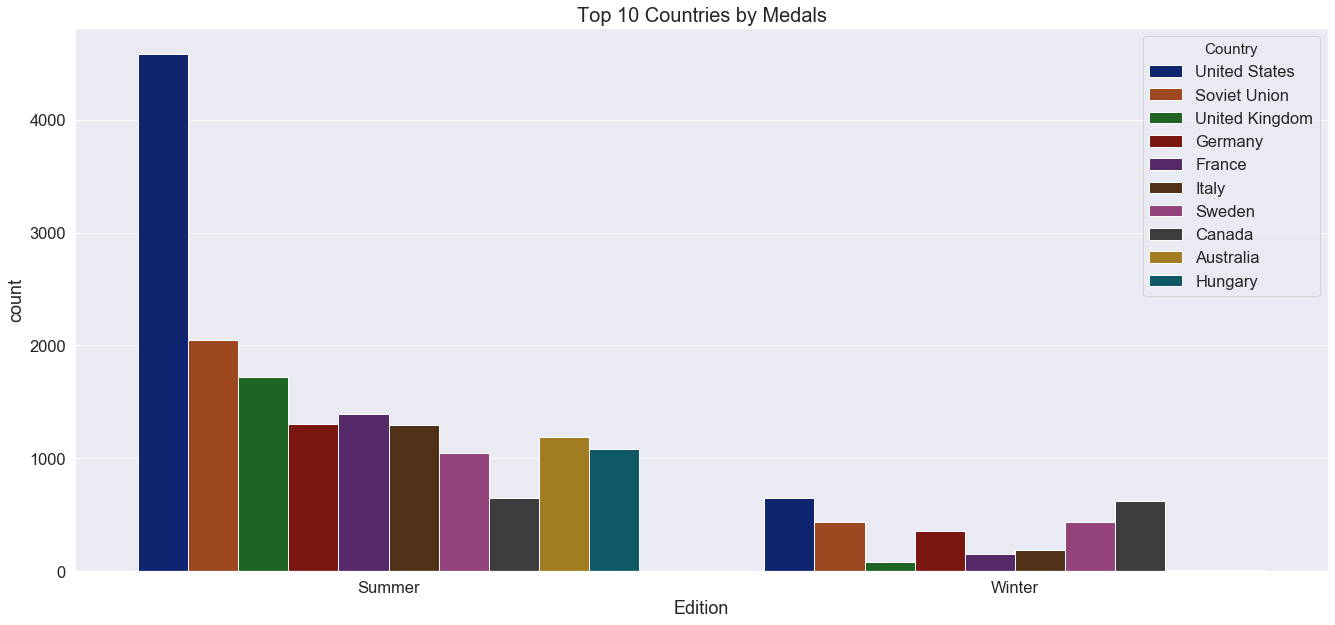

In [102]:
#Here we are plotting again the top ten countries by medal
#But this time they are plotted by edition then country, not country then edition like right above

plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5, palette = 'dark')
sns.countplot(data = olympics_10, x = "Edition", hue = 'Country', hue_order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

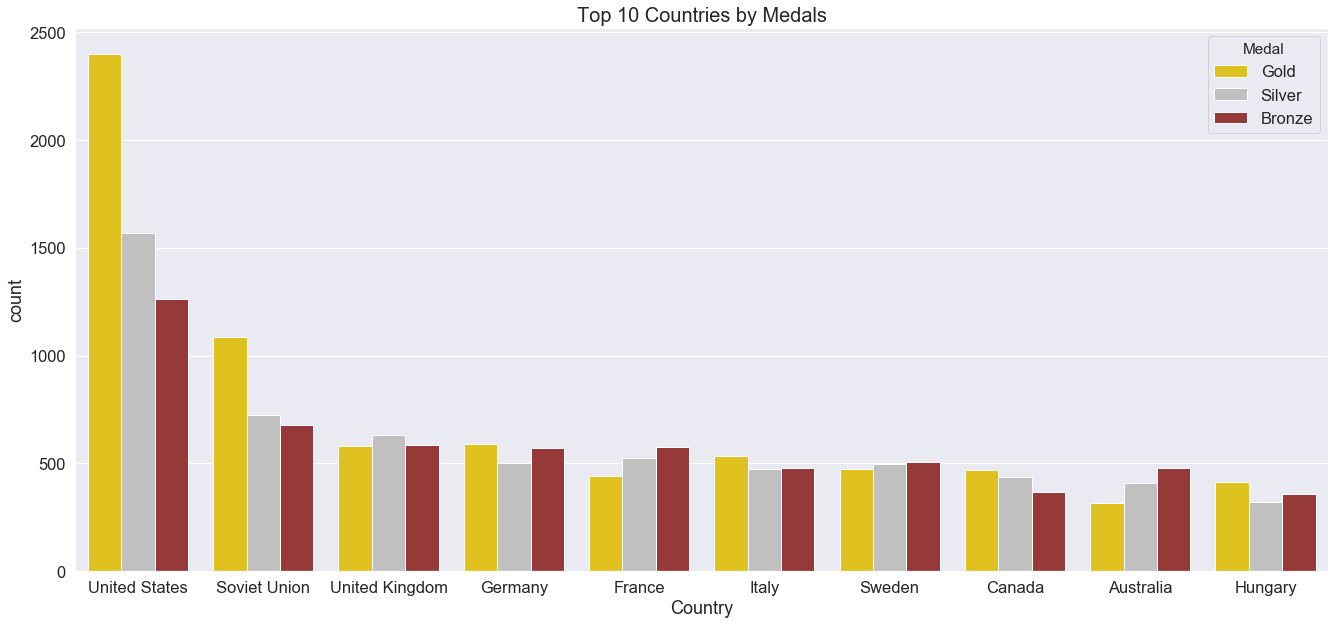

In [103]:
#Here we are plotting again the top ten countries by medal
#But now we are breaking them down by gold-silver-bronze

plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5, palette = 'dark')
sns.countplot(data = olympics_10, x = "Country", hue = 'Medal', order = top_10.index,
             hue_order = ["Gold", "Silver", "Bronze"], palette = ['gold', 'silver', 'brown'])
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

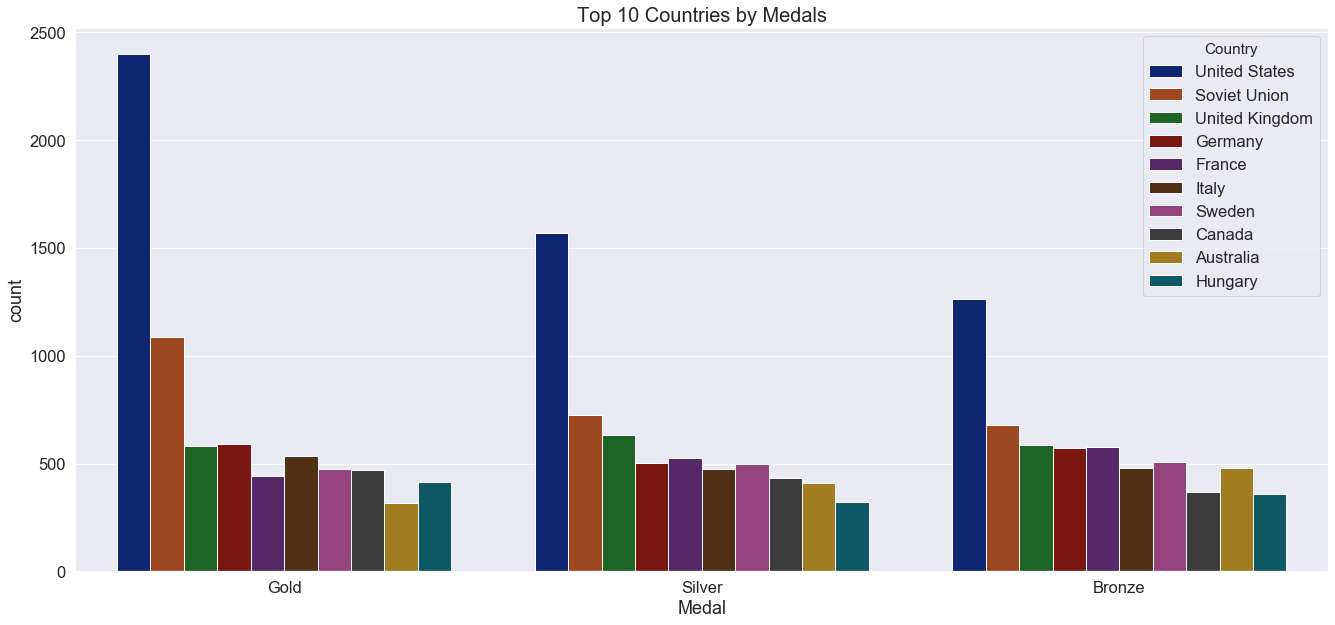

In [104]:
#Here we are plotting again the top ten countries by medal
#But now we are filtering by medal first, then the countries per medal instead of medals per country

plt.figure(figsize = (20,10))
sns.set(font_scale = 1.5, palette = 'dark')
sns.countplot(data = olympics_10, x = "Medal", hue = 'Country', order = ["Gold", "Silver", "Bronze"],
             hue_order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

# Do Other Factors Matter in Olympic Medal Achievement per Country?

In [105]:
#Here we are creating a new dataframe using pd.crosstab
#Compute a simple cross tabulation of two (or more) factors. 
#By default computes a frequency table of the factors unless an array of values and an aggregation function are passed

medals_per_country = pd.crosstab(index = olympics.Country, columns = olympics.Medal,
                                margins = True, margins_name = "Total")

In [106]:
#Here is the new dataframe

medals_per_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,97,108,76,281
...,...,...,...,...
West Indies Federation,0,14,0,14
Yugoslavia,227,191,166,584
Zambia,1,1,0,2


In [107]:
#Here we are dropping the 'Total' column

medals_per_country.drop("Total", axis = 0, inplace = True)

In [108]:
#Here we are adding the Total column back and rearranging the columns to G-S-B instead of the reverse as it was above

medals_per_country = medals_per_country[["Total","Gold","Silver","Bronze"]].sort_values(by = ["Total"])

In [109]:
#Here is the new dataframe

medals_per_country.head()

Medal,Total,Gold,Silver,Bronze
Country,,,,
Iraq,1,0,0,1
Cote d'Ivoire,1,0,1,0
Netherlands Antilles*,1,0,1,0
Djibouti,1,0,0,1
Senegal,1,0,1,0


In [110]:
#Here we are merging the dic dataframe with the medals_per_country dataframe

medals_per_country = medals_per_country.merge(dic, how = 'left', left_index = True, 
                                              right_on = "Country").drop(columns = ["Code"]).set_index("Country")

In [111]:
#Here is the new dataframe. We now have population and gdp added

medals_per_country.head()

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
Iraq,1,0,0,1,36423395.0,4943.760388
Cote d'Ivoire,1,0,1,0,22701556.0,1398.989958
Netherlands Antilles*,1,0,1,0,NaN,NaN
Djibouti,1,0,0,1,887861.0,1945.124293
Senegal,1,0,1,0,15129273.0,899.579879


In [112]:
#Here we are creating a new columns called 'Games' to add to our olympics dataframe

olympics["Games"] = olympics.apply(lambda x: str(x.Year) + " " + x.City, axis = 1)

In [113]:
#Here we are creating a new column called Total Games to add to the medals_per_country dataframe

medals_per_country["Total_Games"] = olympics.groupby("Country").apply(lambda x: x.Games.nunique())

In [114]:
#Here is the new dataframe

medals_per_country.head()

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
Iraq,1,0,0,1,36423395.0,4943.760388,1
Cote d'Ivoire,1,0,1,0,22701556.0,1398.989958,1
Netherlands Antilles*,1,0,1,0,NaN,NaN,1
Djibouti,1,0,0,1,887861.0,1945.124293,1
Senegal,1,0,1,0,15129273.0,899.579879,1


In [115]:
#The rank method gives us the relative rank per column
#The U.S. is ranked 1st in many categories
#Iraq is ranked last in many categories

medals_per_country.rank(ascending = False)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
Iraq,133.5,122.5,135.0,114.5,34.0,76.0,130.5
Cote d'Ivoire,133.5,122.5,113.0,134.5,48.0,102.0,130.5
Netherlands Antilles*,133.5,122.5,113.0,134.5,NaN,NaN,130.5
Djibouti,133.5,122.5,135.0,114.5,117.0,98.0,130.5
Senegal,133.5,122.5,113.0,134.5,60.0,110.0,130.5
...,...,...,...,...,...,...,...
France,5.0,8.0,4.0,4.0,19.0,22.0,3.0
Germany,4.0,3.0,5.0,5.0,15.0,18.0,19.0
United Kingdom,3.0,4.0,3.0,3.0,20.0,13.0,10.0


# Statistical Analysis and Hypothesis Testing

In [116]:
#Here we are dropping the gold silve bronze columns because we just want to focus on total medals won

medals_per_country.drop(columns = ["Gold", "Silver", "Bronze"], inplace = True)

In [117]:
#In statistics, the Pearson correlation coefficient also known as Pearson's r, 
#the Pearson product-moment correlation coefficient (PPMCC), the bivariate correlation,[1] 
#or colloquially simply as the correlation coefficient[2] ― is a measure of linear correlation between two sets of data.
#It is the ratio between the covariance of two variables and the product of their standard deviations; 
#thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1.

medals_per_country.corr(method = 'pearson')

,Total,Population,GDP,Total_Games
Total,1.000000,0.206588,0.437979,0.712710
Population,0.206588,1.000000,-0.089976,0.123516
GDP,0.437979,-0.089976,1.000000,0.565116
Total_Games,0.712710,0.123516,0.565116,1.000000


In [118]:
#In statistics, Spearman's rank correlation coefficient or Spearman's ρ 
#is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). 
#It assesses how well the relationship between two variables can be described using a monotonic function.
#The Spearman correlation between two variables is equal to the Pearson correlation between the rank values
#of those two variables; while Pearson's correlation assesses linear relationships, Spearman's 
#correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, 
#a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.


medals_per_country.corr(method = 'spearman')

,Total,Population,GDP,Total_Games
Total,1.000000,0.417575,0.470498,0.925996
Population,0.417575,1.000000,-0.239097,0.400471
GDP,0.470498,-0.239097,1.000000,0.501986
Total_Games,0.925996,0.400471,0.501986,1.000000


In [119]:
medals_per_country.rank(ascending = False).corr(method = 'pearson')

,Total,Population,GDP,Total_Games
Total,1.000000,0.418030,0.469536,0.925996
Population,0.418030,1.000000,-0.239567,0.400095
GDP,0.469536,-0.239567,1.000000,0.501145
Total_Games,0.925996,0.400095,0.501145,1.000000


In [120]:
#Here we are importing the stats library from scipy

import scipy.stats as stats

#### Hypothesis One: There is no relationship between total medals and population

In [121]:
#Calculate a Spearman correlation coefficient with associated p-value.
#The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship 
#between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets 
#are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no 
#correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, 
#so does y. Negative correlations imply that as x increases, y decreases.

#We have a positive correlation of .42 and a p-value very close to zero
#This suggests there actually is a relationship between total medals and population

stats.spearmanr(medals_per_country.Total, medals_per_country.Population, nan_policy = 'omit')

SpearmanrResult(correlation=0.41757450804366214, pvalue=9.394624220690899e-07)

In [122]:
r, p_value = stats.spearmanr(medals_per_country.Total, medals_per_country.Population, nan_policy = 'omit')

In [123]:
r

0.41757450804366214

In [124]:
round(p_value)

0.0

Because of the positive correlation and very low p-value, we must reject the null hypothesis that there is no relationship between total medals and population.

#### Hypothesis Two: There is no relationship between total medals and GDP per capita

In [125]:
r, p_value = stats.spearmanr(medals_per_country.Total, medals_per_country.GDP, nan_policy = 'omit')

In [126]:
#There is a positive correlation between GDP per capita and total medals won

r

0.470497525259415

In [127]:
#The p-value is very low

round(p_value)

0.0

Like above, due to positive correlation and a miniscule p-value, we must reject the null hypothesis that there is no relationship between GDP per capita and total medals won. 

#### Hypothesis Three: There is no relationship between total medals and times participated in the olympics

In [128]:
r, p_value = stats.spearmanr(medals_per_country.head(50).Total, medals_per_country.head(50).Total_Games, nan_policy = 'omit')

In [129]:
#There is a strong positive correlation between the amount of times a country has participated and the medals its won

r

0.8562495098644284

In [131]:
#The p-value is close to 0, showing there is a relationship between medals won and times participated

round(p_value)

0.0

We are rejecting the null hypothesis for the third hypothesis as well.

# Aggregating and Ranking

In [132]:
#Here we are creating a new dataframe called 'sum_vs_win' that is a crosstab of the Country and Edition columns

sum_vs_win = pd.crosstab(olympics.Country, olympics.Edition)

In [133]:
#Here is the new dataframe
#We have country as the index, with summer and winter columns with the medals total

sum_vs_win

Edition,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,260,21
...,...,...
West Germany,7,0
West Indies Federation,14,0
Yugoslavia,490,94


In [134]:
#Here we are creating a new dataframe called 'men_vs_women'
#It's a crosstab of the country and gender columns

men_vs_women = pd.crosstab(olympics.Country, olympics.Gender)

In [135]:
#Here is a look at the new dataframe
#We have country as the index and then men and women as the columns with the medals they've won

men_vs_women

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,217,64
...,...,...
West Germany,6,1
West Indies Federation,0,14
Yugoslavia,450,134


In [136]:
#Here we are combining the sum vs win and men vs women dataframes together

medals_by_cats = pd.concat([sum_vs_win, men_vs_women], axis =1)

In [137]:
#Here is the newly combined dataframe

medals_by_cats

,Summer,Winter,Men,Women
Country,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,260,21,217,64
...,...,...,...,...
West Germany,7,0,6,1
West Indies Federation,14,0,0,14
Yugoslavia,490,94,450,134


In [138]:
#Here we are creating a new column called 'Total' that adds the medals won in summer and winter

medals_by_cats["Total"] = medals_by_cats.Summer + medals_by_cats.Winter

In [139]:
#Here we are sorting the dataframe by the total medals won

medals_by_cats.sort_values("Total", ascending = False, inplace = True)

In [140]:
#Here is the new dataframe after all the editing
#The US then the Soviet Union have the most medals

medals_by_cats

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548
...,...,...,...,...,...
Togo,1,0,1,0,1
Eritrea,1,0,1,0,1
Guatemala,1,0,1,0,1


In [141]:
#Here we are creating a separate dataframe called 'ranks' that ranks the medals won per country

ranks = medals_by_cats.rank(ascending = False, method = 'average')

In [142]:
#Here is the new dataframe
#The U.S. is first in every column

ranks

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,4.0,2.0,2.0,2.0
United Kingdom,3.0,19.0,3.0,11.0,3.0
Germany,5.0,7.0,7.0,4.0,4.0
France,4.0,14.0,4.0,16.5,5.0
...,...,...,...,...,...
Togo,132.5,95.5,127.5,120.0,133.5
Eritrea,132.5,95.5,127.5,120.0,133.5
Guatemala,132.5,95.5,127.5,120.0,133.5


In [143]:
#Here we are creating a separate dataframe called 'top_50'
#We are taking the top 50 ranked countries in medals won

top_50 = ranks.head(50)

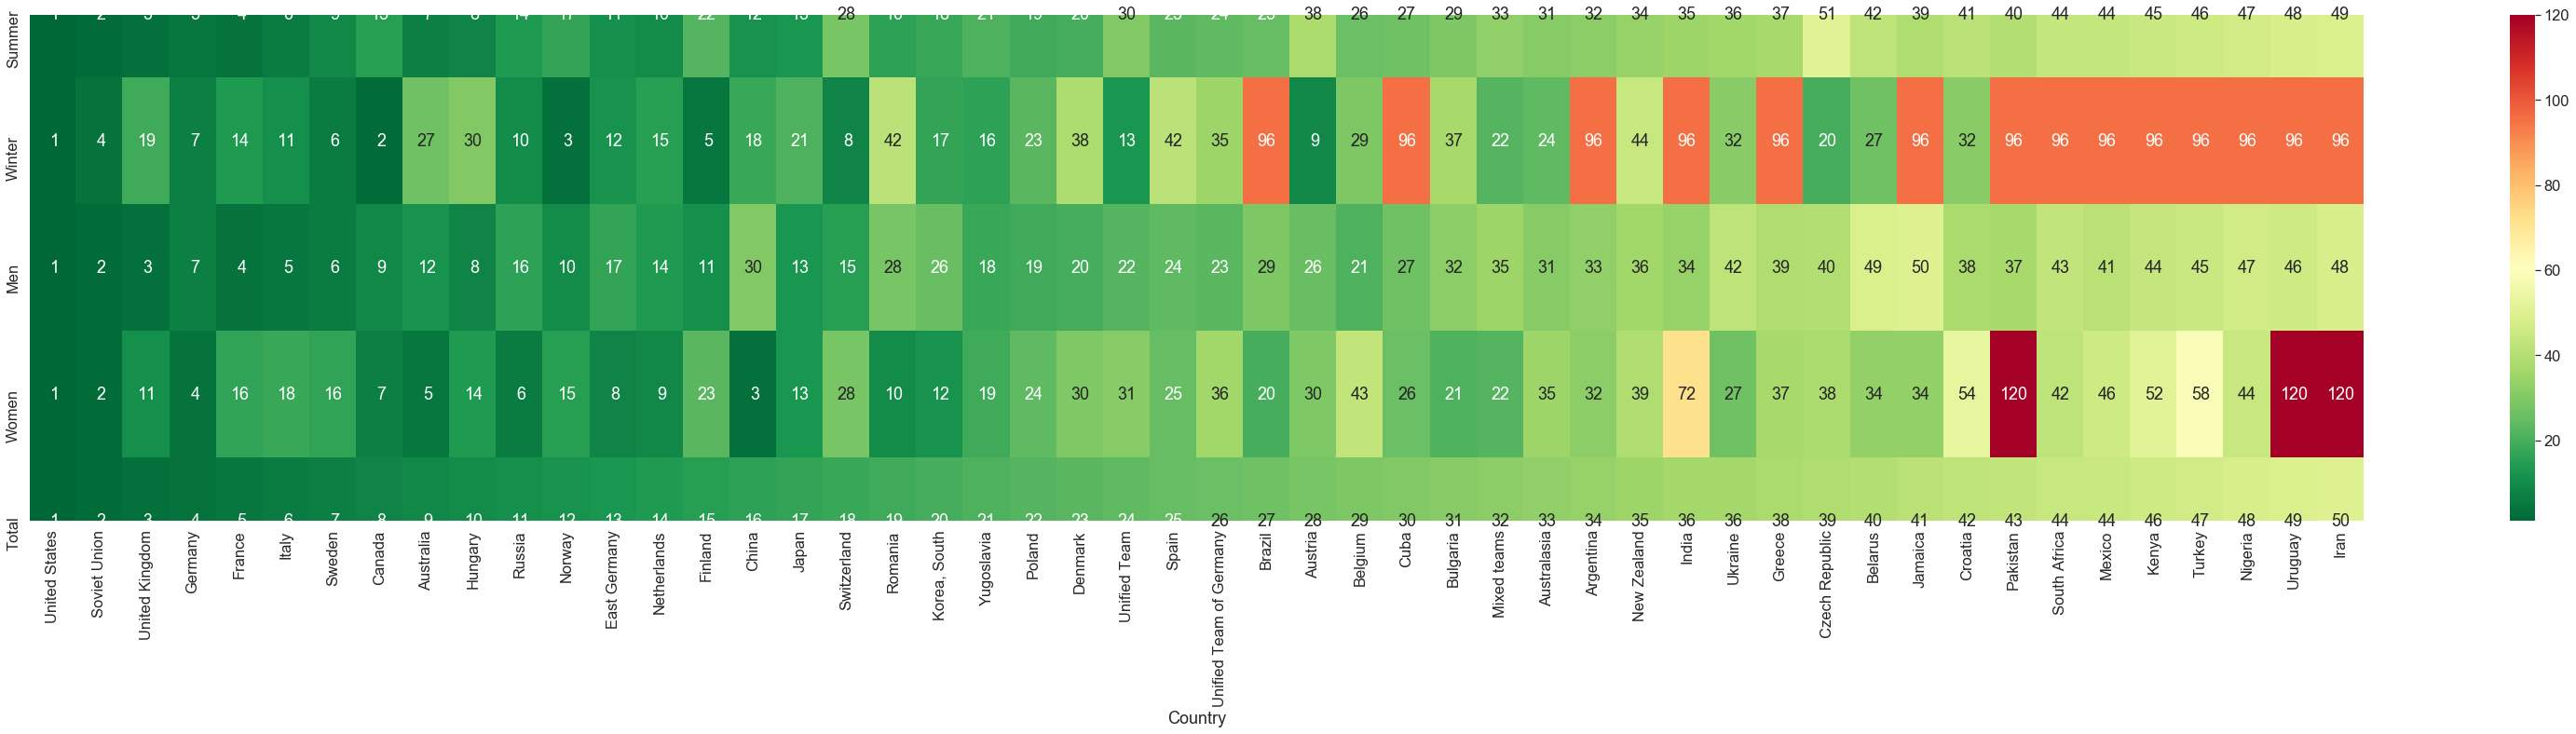

In [144]:
#Here we are visualzing the top 50 dataframe with a seaborn heatmap

plt.figure(figsize = (50,10))
sns.heatmap(top_50.T, cmap = 'RdYlGn_r', annot=True, fmt = '2.0f')
plt.show()

# Does Geographical Location Matter?

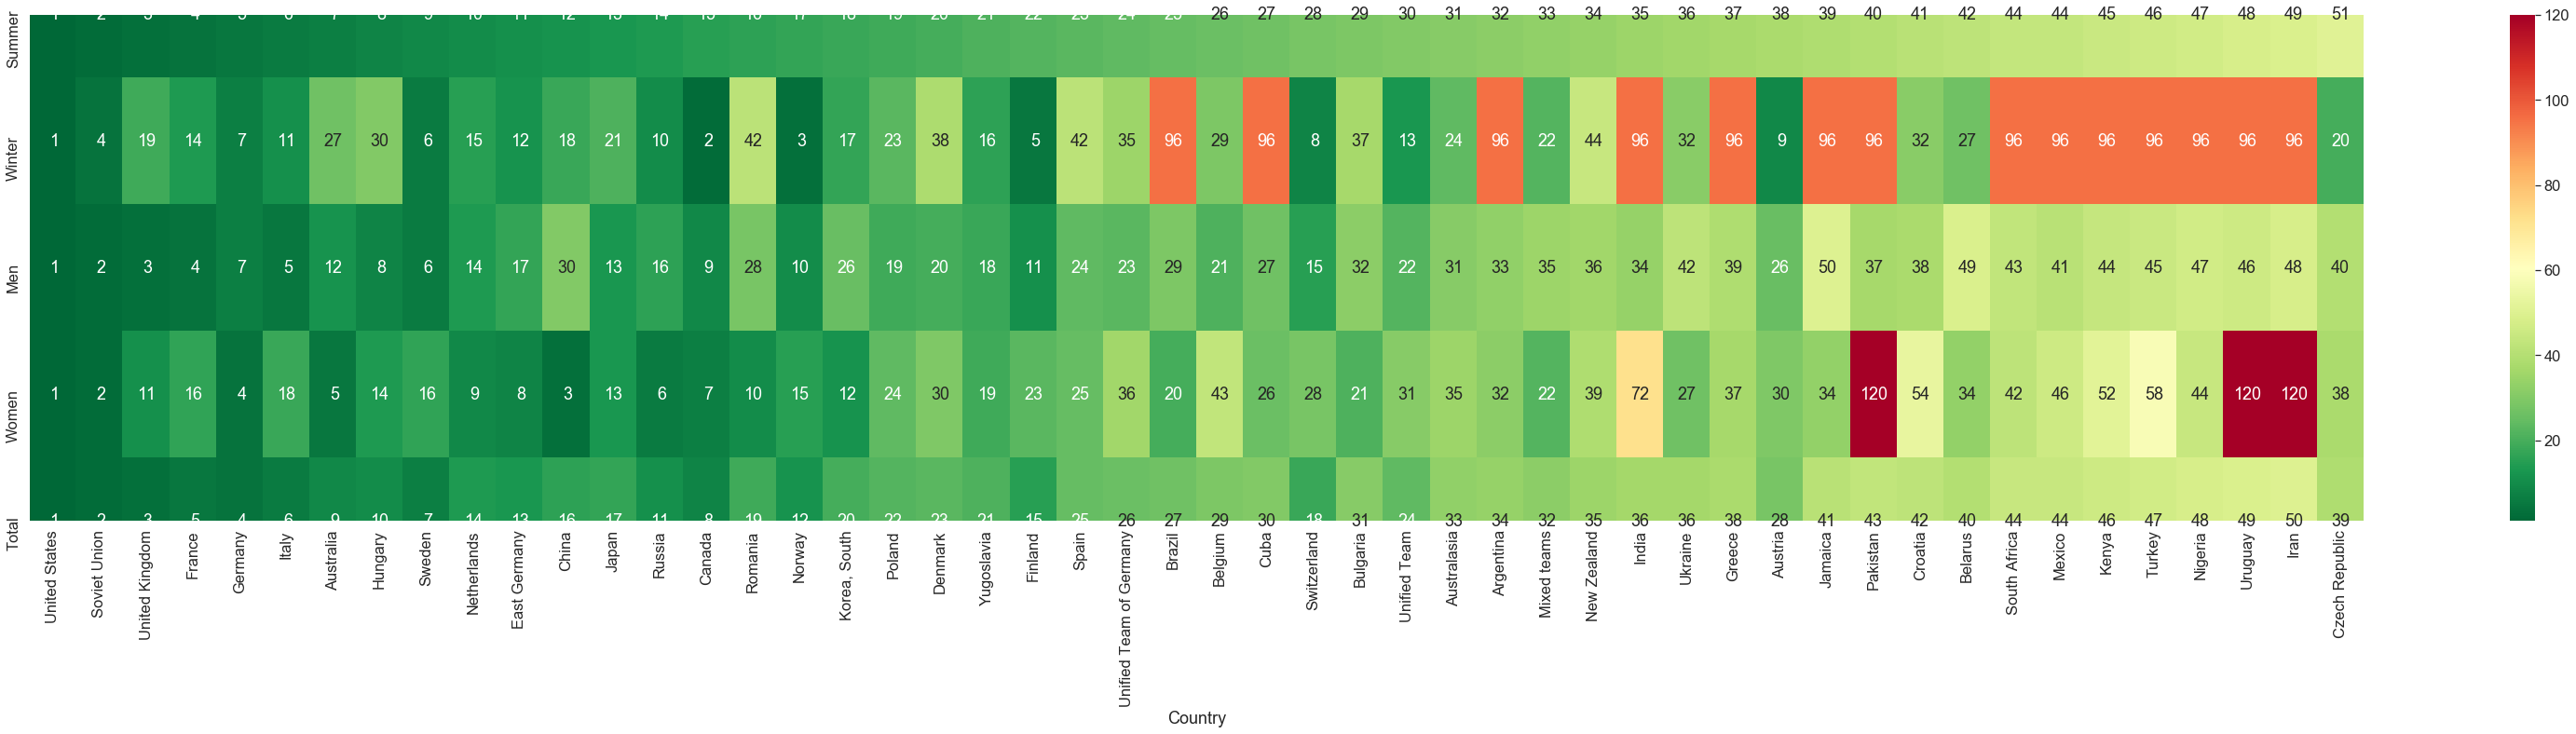

In [145]:
#Here we are visualzing the top 50 dataframe with a seaborn heatmap, but sorted by Summer medals

plt.figure(figsize = (50,10))
sns.heatmap(top_50.sort_values(by = 'Summer').T, cmap = 'RdYlGn_r', annot=True, fmt = '2.0f')
plt.show()

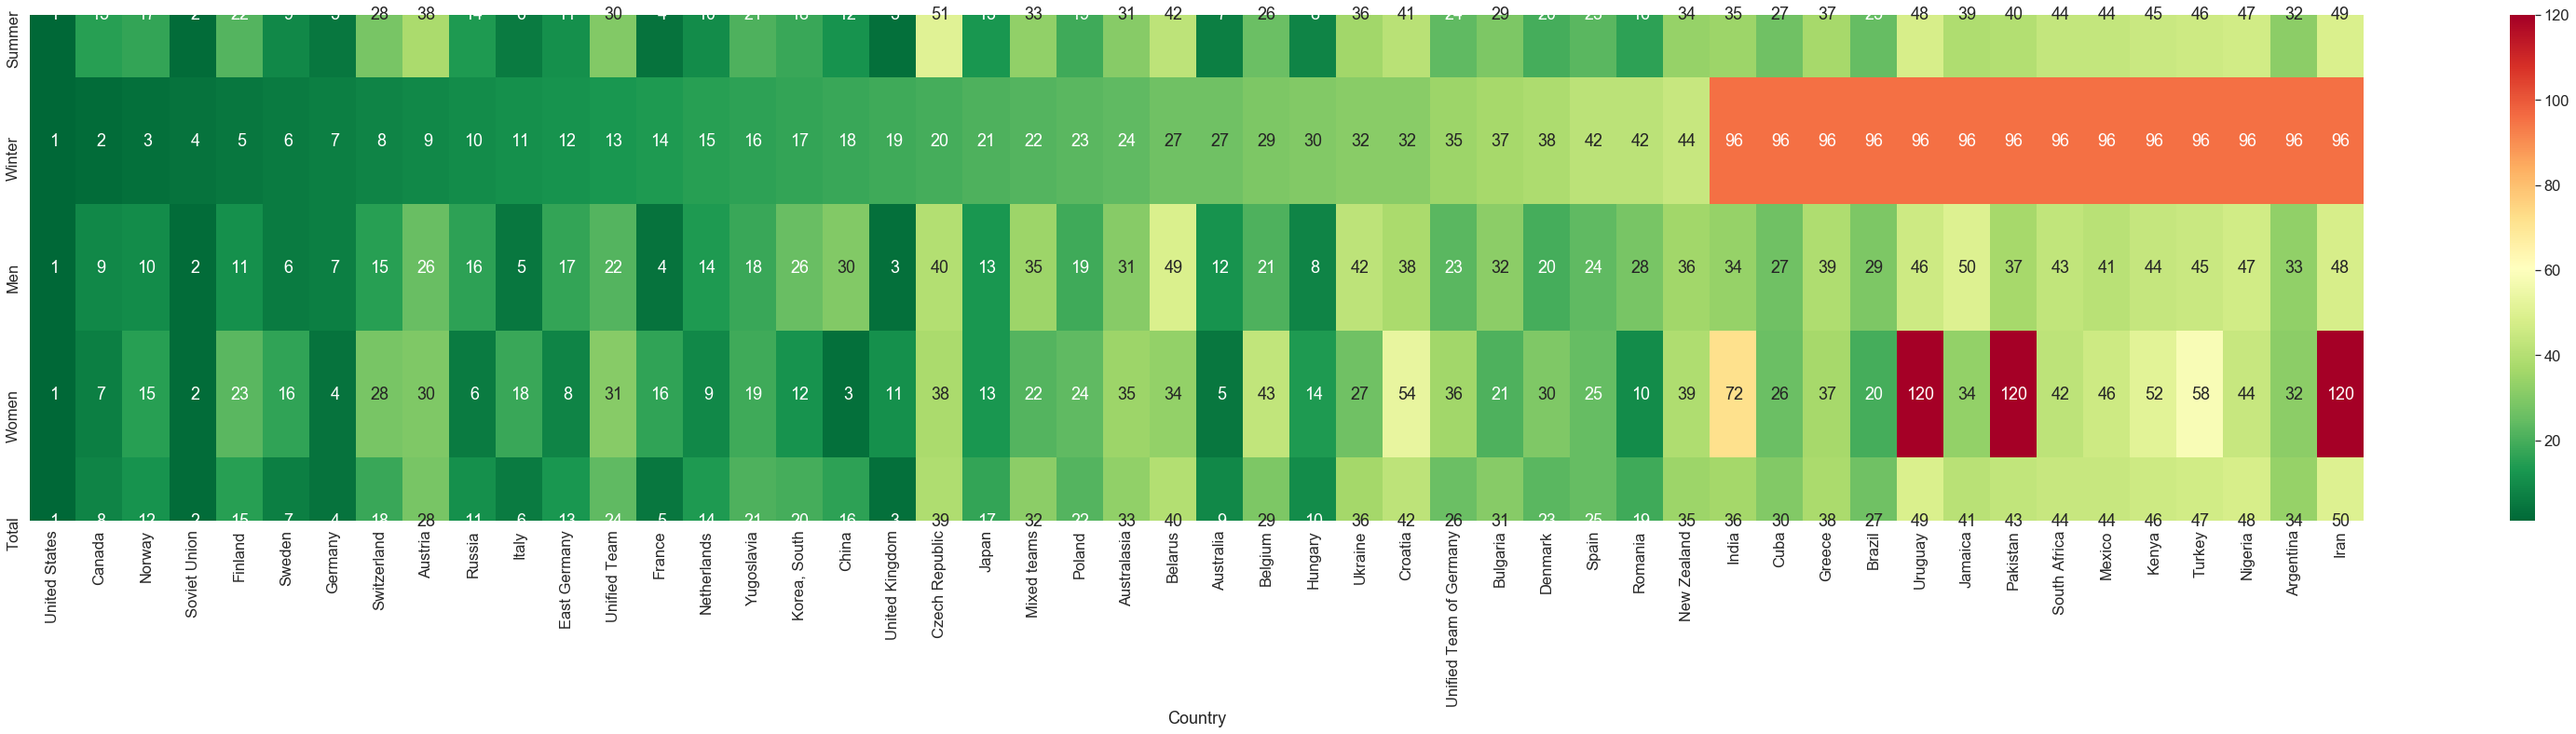

In [146]:
#Here we are visualzing the top 50 dataframe with a seaborn heatmap, but sorted by Winter medals

plt.figure(figsize = (50,10))
sns.heatmap(top_50.sort_values(by = 'Winter').T, cmap = 'RdYlGn_r', annot=True, fmt = '2.0f')
plt.show()

In [152]:
#Here we are creating a new dataframe called 'rank_diff' that subtracts winter medals from summer medals

rank_diff = top_50.Summer.sub(top_50.Winter).sort_values().to_frame()

In [153]:
#Here is the new dataframe

rank_diff

,0
Country,
Brazil,-70.5
Cuba,-68.5
Argentina,-63.5
India,-60.5
Greece,-58.5
Jamaica,-56.5
Pakistan,-55.5
Mexico,-52.0
South Africa,-52.0


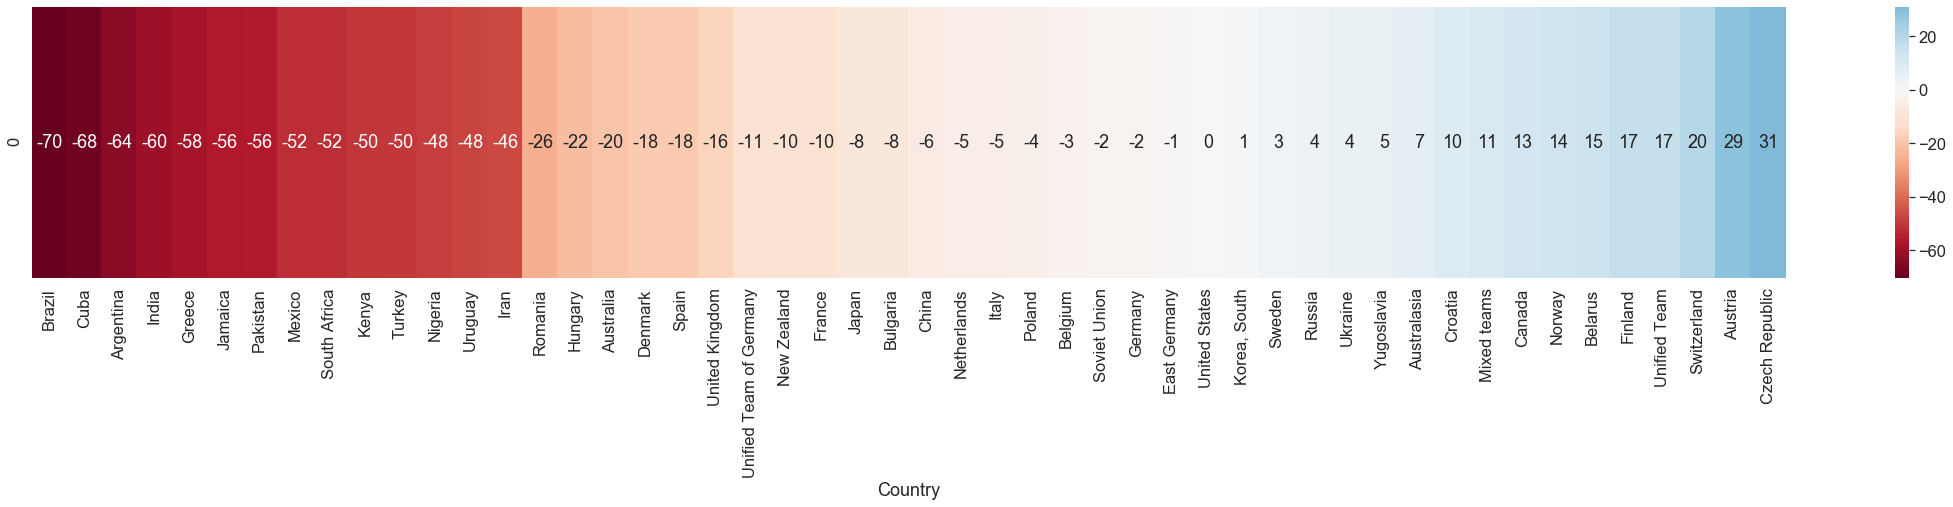

In [154]:
#Here we are visualzing the top 50 dataframe with a seaborn heatmap, but sorted by Winter medals
#The countries in red are clearly the summer medal countries
#The ones in blue do better in winter
#The ones in the middle are about even in both seasons

plt.figure(figsize = (35,5))
sns.heatmap(rank_diff.T, cmap = 'RdBu', annot=True, fmt = '2.0f', center = 0)
plt.show()

# What Is the Gender Breakdown in Medal Winning?

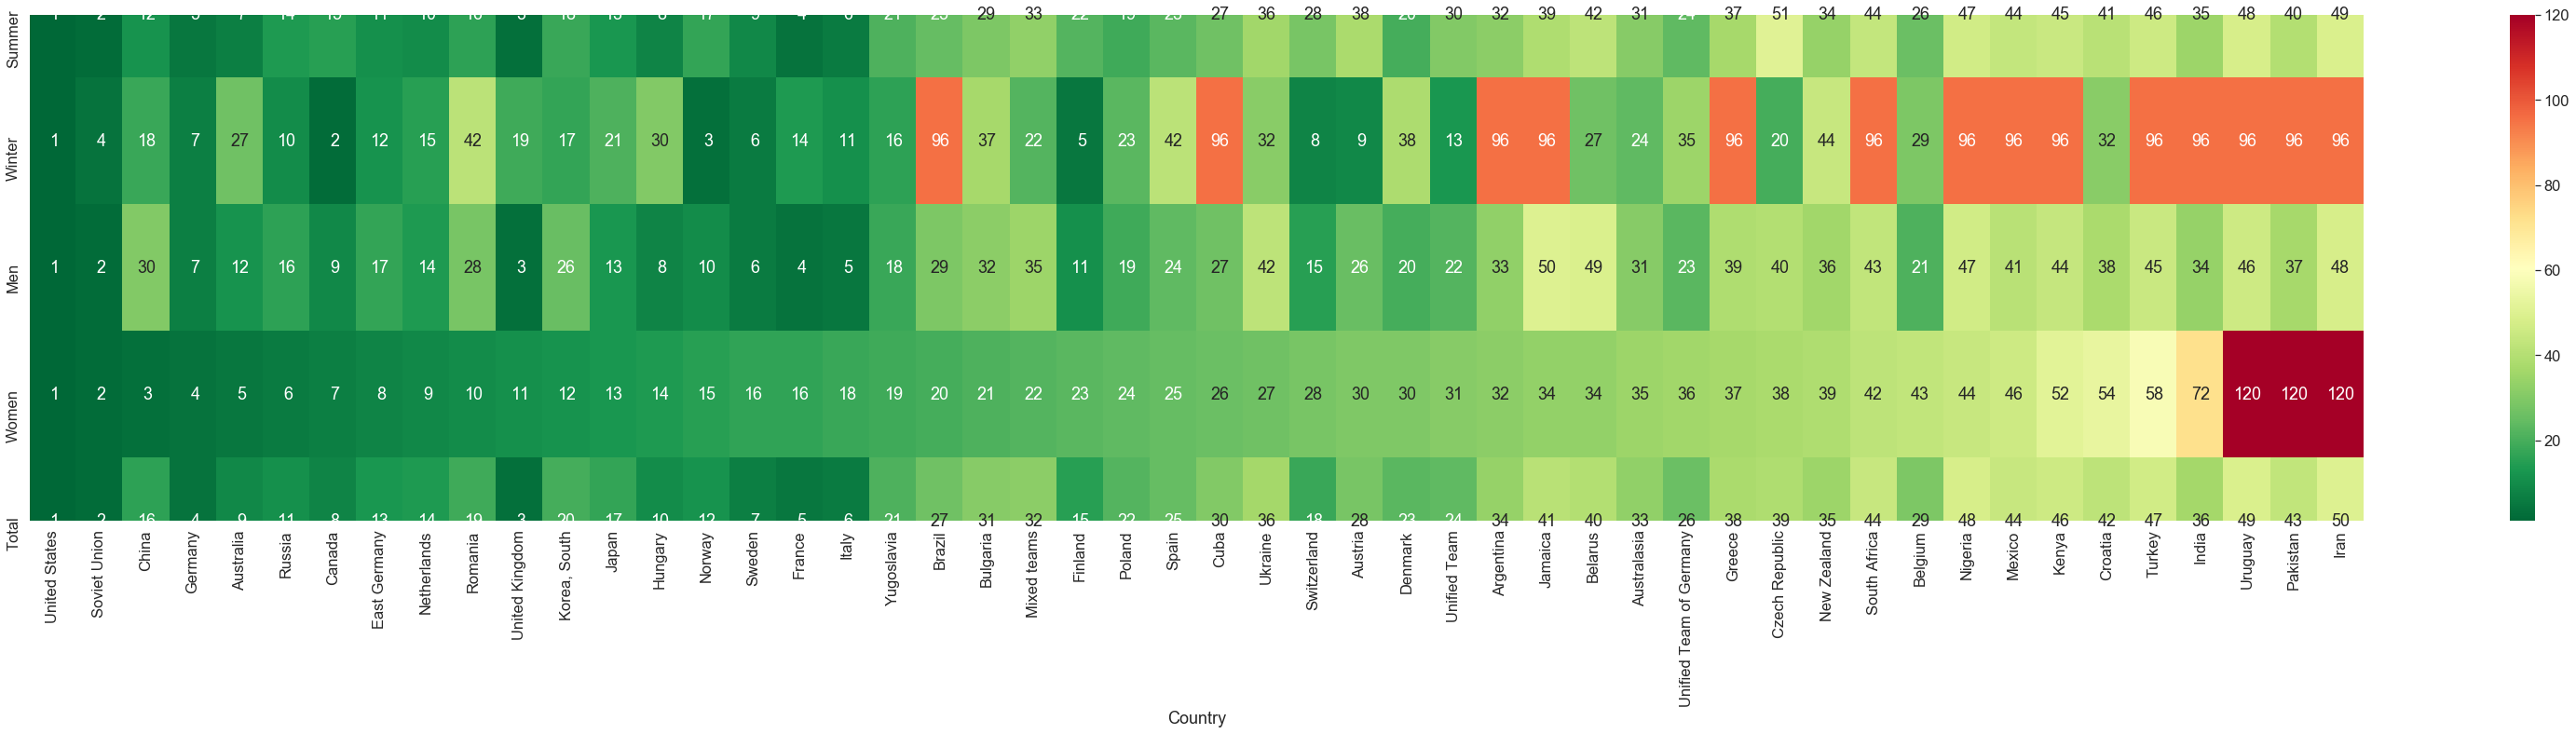

In [155]:
#Here we are visualizing the top 50 countries but sorting them by female winners

plt.figure(figsize = (50,10))
sns.heatmap(top_50.sort_values(by = 'Women').T, cmap = 'RdYlGn_r', annot=True, fmt = '2.0f')
plt.show()

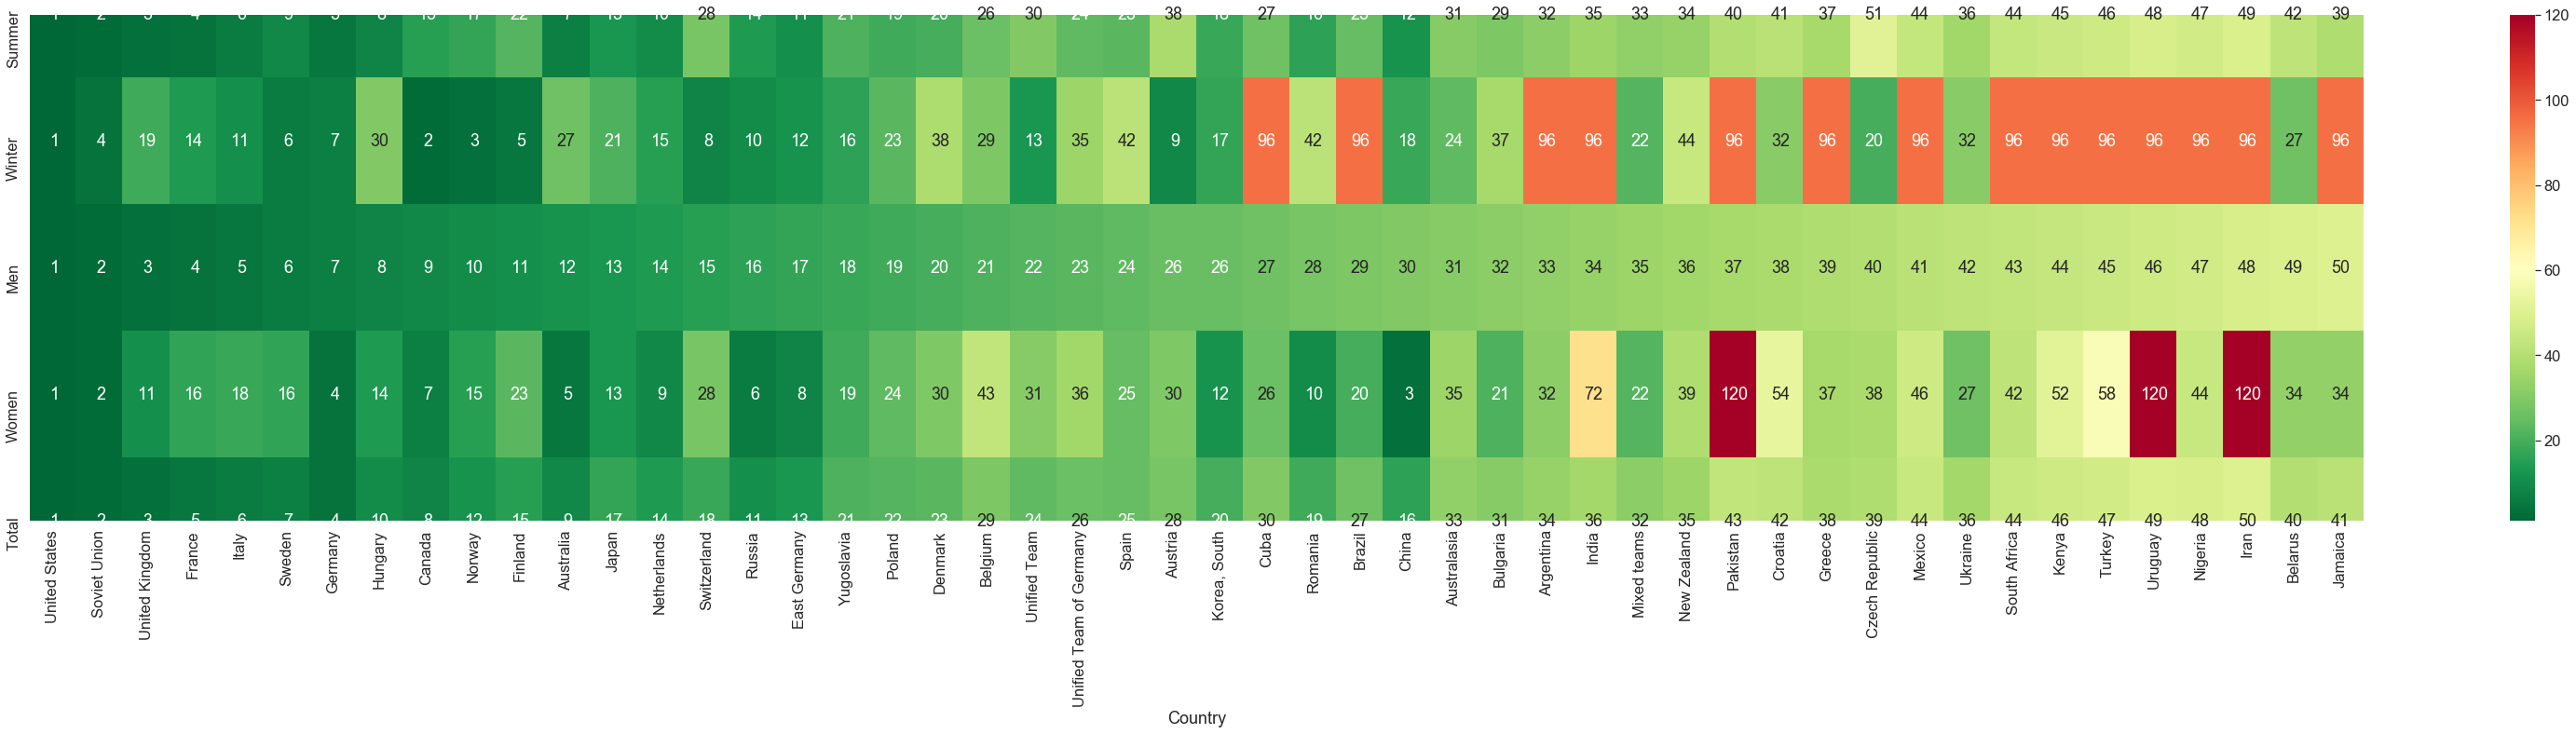

In [156]:
#Here we are visualizing the top 50 countries but sorting them by male winners

plt.figure(figsize = (50,10))
sns.heatmap(top_50.sort_values(by = 'Men').T, cmap = 'RdYlGn_r', annot=True, fmt = '2.0f')
plt.show()

In [158]:
#Here we are creating a new dataframe called 'rank_diff2' which subtracts women medal winners from male medal winners

rank_diff2 = top_50.Men.sub(top_50.Women).sort_values().to_frame()

In [159]:
#Here is the new dataframe

rank_diff2

,0
Country,
Pakistan,-83.0
Uruguay,-74.0
Iran,-72.0
India,-38.0
Belgium,-22.0
Croatia,-15.5
Turkey,-13.5
Unified Team of Germany,-13.0
Italy,-13.0


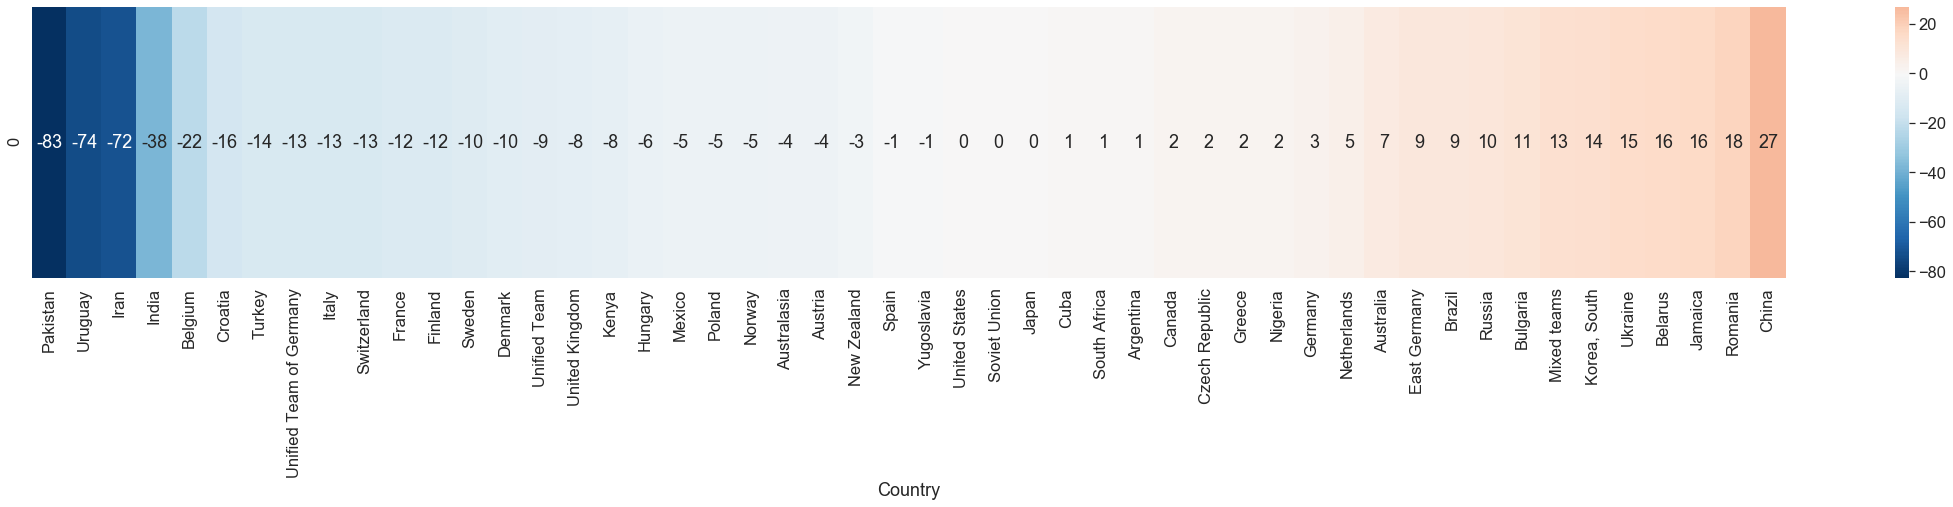

In [160]:
#Here we are visualizing the top 50 countries, but divided by gender
#The countries in blue have more female winners than male
#The countries in red have more male winners than female
#The ones in the middle are about even


plt.figure(figsize = (35,5))
sns.heatmap(rank_diff2.T, cmap = 'RdBu_r', annot=True, fmt = '2.0f', center = 0)
plt.show()

# Which Countries Do Best in Certain Olympic Sports?

In [161]:
#Here we are creating an index called 'sports' that outlines the different olympic games

sports = olympics.Sport.value_counts().index

In [162]:
#Here is the index

sports

Index(['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Skiing', 'Fencing',
       'Ice Hockey', 'Football', 'Hockey', 'Skating', 'Wrestling', 'Shooting',
       'Sailing', 'Cycling', 'Basketball', 'Canoe / Kayak', 'Volleyball',
       'Handball', 'Equestrian', 'Boxing', 'Weightlifting', 'Judo',
       'Bobsleigh', 'Biathlon', 'Baseball', 'Archery', 'Tennis', 'Rugby',
       'Softball', 'Luge', 'Modern Pentathlon', 'Curling', 'Badminton',
       'Table Tennis', 'Taekwondo', 'Tug of War', 'Canoe', 'Polo', 'Lacrosse',
       'Golf', 'Triathlon', 'Cricket', 'Rackets', 'Croquet',
       'Water Motorsports', 'Basque Pelota', 'Roque', 'Jeu de paume'],
      dtype='object')

In [163]:
#Here we are creating an index with the top 20 countries in medals won

top_20 = olympics.Country.value_counts().head(20).index

In [164]:
#Here is the index

top_20

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary', 'Russia', 'Norway',
       'East Germany', 'Netherlands', 'Finland', 'China', 'Japan',
       'Switzerland', 'Romania', 'Korea, South'],
      dtype='object')

In [165]:
#Here we are creating a dataframe that is a crosstab of the country and sports columns

by_sport = pd.crosstab(olympics.Country, olympics.Sport)

In [166]:
#So here you can see which countries do well in which sports 
#Argenina has 24 medals in basketball

by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Algeria,0,0,7,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Argentina,3,0,5,0,0,24,0,0,0,24,...,0,0,1,6,0,0,12,0,2,0
Armenia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,6
Australasia,31,0,42,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
West Indies Federation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yugoslavia,62,0,67,0,0,0,0,14,22,6,...,0,0,0,3,0,0,0,0,7,9


In [167]:
#Here we are adjusting our by_sport dataframe to rank the countries by average medals won

by_sport = by_sport.rank(ascending = False, method = 'average')

In [168]:
#Now we are applying the two indices we created above to filter the by_sport dataframe

by_sport = by_sport.loc[top_20, sports].copy()

In [169]:
#Here is the new dataframe
#The US is first in Aquatics, 12th in hockey, etc

by_sport.head()

,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
United States,1.0,1.0,1.0,2.0,8.0,7.0,2.0,1.0,12.0,1.0,...,3.0,1.0,9.5,74.0,73.5,73.5,74.0,74.0,1.0,2.0
Soviet Union,4.0,3.0,7.0,1.0,5.0,4.0,5.0,3.0,11.0,4.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
United Kingdom,10.5,2.0,2.0,19.0,34.5,15.0,10.0,20.0,5.0,16.0,...,2.0,2.0,5.0,1.5,1.0,73.5,1.0,74.0,73.5,1.0
Germany,5.0,7.0,5.0,16.0,6.0,6.0,13.0,7.5,4.0,9.0,...,74.5,74.5,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
France,14.0,8.0,11.0,17.0,10.0,2.0,79.5,23.0,83.0,17.0,...,74.5,74.5,79.0,1.5,73.5,1.0,2.0,1.5,73.5,74.0


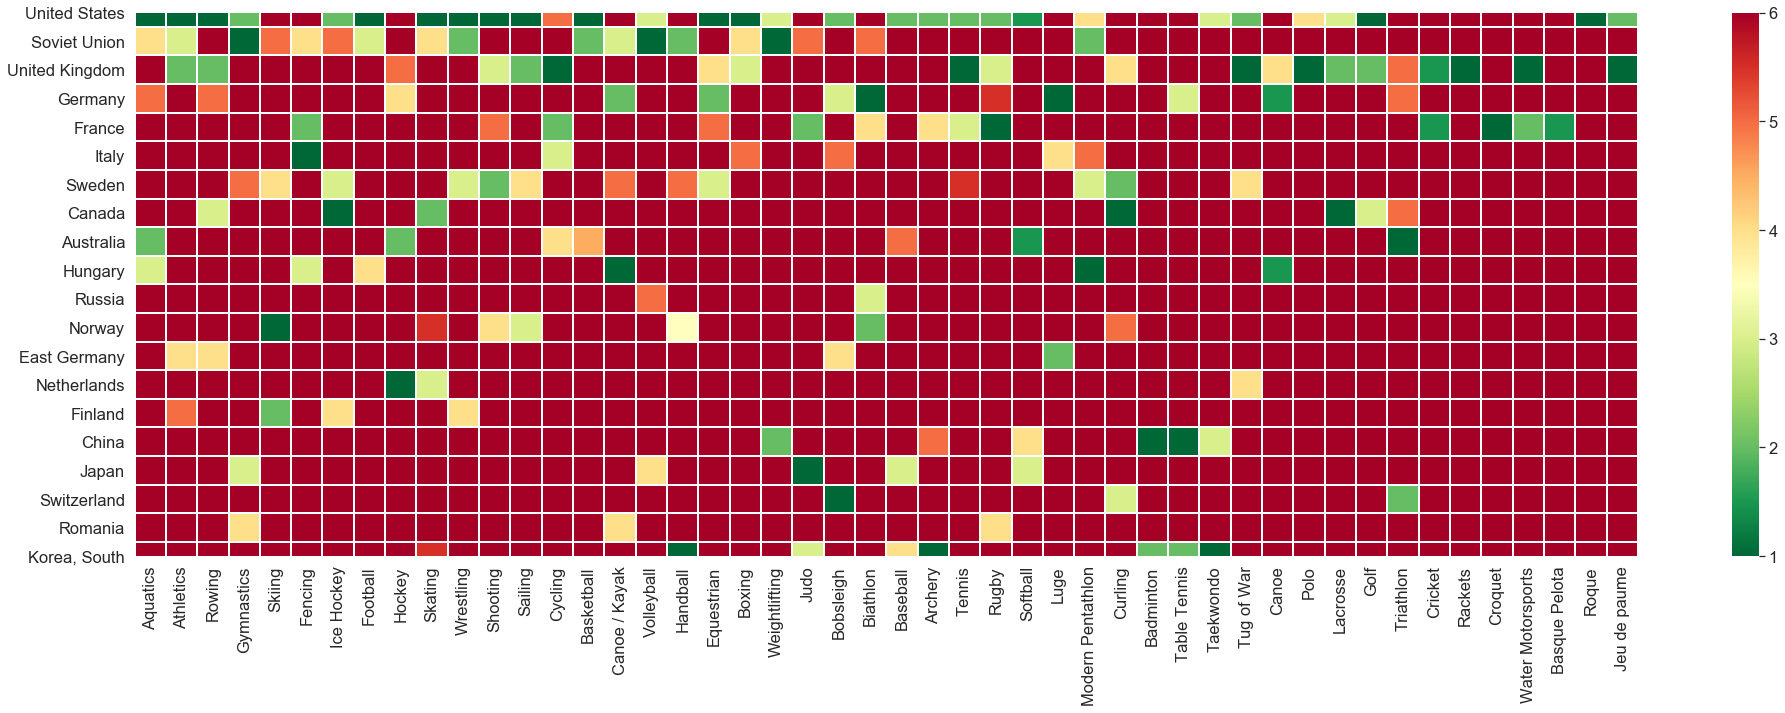

In [170]:
#Here we are visualizing the rank of countries per sport

plt.figure(figsize = (30,10))
sns.heatmap(by_sport, cmap = 'RdYlGn_r', vmin = 1, vmax = 6, linewidth = 1)
plt.show()